In [9]:
import pandas as pd

In [100]:
data=pd.read_csv('HCBG_Customer_dataset.csv',encoding='UTF8')
data.info()
df=data.iloc[:,[5,9,24,37,43]]
numerical_df=data.iloc[:,list(range(49,59,1))]
df.info()
# data["Job Role"].value_counts() 
# 특정 3개정도에 1300개 정도 뭉쳐있음
#짜잘이들 others로 묶어서?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Contact ID                                   1978 non-null   int64  
 1   Contact External ID                          1978 non-null   object 
 2   Buying Horizon                               0 non-null      float64
 3   Company Revenue                              0 non-null      float64
 4   Company Type                                 0 non-null      float64
 5   Country                                      1978 non-null   object 
 6   Created DateTime                             1978 non-null   object 
 7   Department                                   949 non-null    object 
 8   Disqualified Reason                          333 non-null    object 
 9   Division                                     1978 non-null   object 
 10  

In [103]:
""" 유니크한 ID/Name은 클러스터링의 성능에 부정적 영향을 초래(ID, Name)
row의 수가 적거나 많은 고유값을 가지는 혹은 특정값(들)에 편향 되어있는 변수는 제외
우량/보통/소극 등의 고객 특성을 군집하는 분석에 맞지 않는 변수 제외 """

# data["Disqualified Reason"].value_counts()
# row수가 적음

# data["Department"].value_counts()
# 노이즈값이 존재

# data["Division"].value_counts() 
#고유값 3개, 특정 고유값은 너무 적을 row
#DVIVISION EMSD뺴자?

# data["Email Domain"].value_counts() 
# 총 611개..주요 메일만 추리면 어떨까?

# data["Email Opt-In Type"].value_counts()
# Express 가 압도적으로 많아서 무의미

#Has Business Phone Number Indicator/Email Adress/First Name/Last Name 
# 한 고유값만 있거나 한쪽으로 많이 치우침

# data["Has Line 1 Address"].value_counts() 
# LINE 1/2/3가 될수록 0의 값이 지배적으로 많아짐

# data["Has Mobile Phone Number"].value_counts() 
# 1504/474

# data["Industry"].value_counts() 
# 너무 적어서 의미 없다

# data["Integrated Marketing and Sales Funnel Stage"].value_counts() 
# MQL 1081/Sales Accepted Lead 277/ SQL 31

# data["Job Role"].value_counts() 
# 특정 3개정도에 1300개 정도 뭉쳐있음
#짜잘이들 others로 묶어서?


# data["Country"].value_counts() 
# country와 겹치지 않을까?

# data["Lead Source Original"].value_counts() 
# 디테일 살려야하나?

# data["Lead Source Most Recent"].value_counts() 
# 디테일 살려야하나?

# data["Lead Status"].value_counts() 
# ???데이터가 많음

#32~36까지는 너무 로우 없어서 제외

#saluation 의미는있으나 필터링해서 사용해보는게 좋을듯?

#SFDC관련 데이터(38~$$)는 Campaign Stauts 제외하면 활용이 어려울듯
#data["SFDC Last Campaign ID"].value_counts() 
#켐페인 고유값이 243개로 너무 많음.. 카테고라이즈가 가능할까?
# data["SFDC Last Campaign Status"].value_counts()
#In progress 값 통일 시켜줘야할듯! In Progress/ In progress

#data["State/Prov"].value_counts()
#159개의 고유값보다는 나라로 그룹핑해서 보는게 좋을듯

# data["Suffix"].value_counts()
#데이터가 없어서 날리는게 좋을듯

# data["Tracking Code"].value_counts()
# 412개 고유값 너무 많다

#data["Contact Type Indicator"].value_counts()
# R 1973/ I 5로 너무 편향되어있어서 무의미할듯

#

gmail.com                        540
yahoo.co.jp                      170
naver.com                        142
hanmail.net                       81
hotmail.com                       64
                                ... 
kpjseremban.com                    1
hanno-ortho.com                    1
platinumdentalstudio.com.au        1
sylaidis.com                       1
camberwelldentalcentre.com.au      1
Name: Email Domain, Length: 611, dtype: int64

In [73]:
#validation between convoptys & convoptyss

a=0

for i in range(len(data["convoptys"])):
    if data["convoptys"][i]==data["convoptyss"][i]:
        a+=0
    else:
        a+=1
a

"""모든 로우에서 두 변수가 다른 값을 가지는 row는 5개이다
거의 같은 값으로 보고 하나의 변수만 택하는 것이 옳다"""

5

In [91]:
# 수치형 데이터에 대한 기초 통계량 확인
"""데이터가 연관되어 있기 때문에 단계적으로 연관성 분석에 대한 가능성도 보인다.
EX)이메일을 보내고 오픈에는 어떤 것이 영향을 미쳤을지"""

numerical_df.describe()

,conv leads,convoptys,convoptyss,wonconvoptys,PageViews,formsubmits,webvisits,emailclicks,emailopens,EmailSends
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,1.305865,1.246208,1.243680,0.403943,31.409505,4.642568,7.340748,14.020728,10.707280,52.338220
std,0.722481,0.711598,0.714241,0.611907,54.290542,3.693786,10.764465,35.718892,12.306397,39.898295
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,0.000000,7.000000,2.000000,2.000000,3.000000,3.000000,23.000000
50%,1.000000,1.000000,1.000000,0.000000,17.000000,4.000000,4.000000,7.000000,7.000000,44.500000
75%,1.000000,1.000000,1.000000,1.000000,36.000000,6.000000,8.000000,16.000000,14.000000,69.000000
max,10.000000,9.000000,9.000000,5.000000,1241.000000,33.000000,140.000000,1164.000000,204.000000,365.000000


<AxesSubplot:>

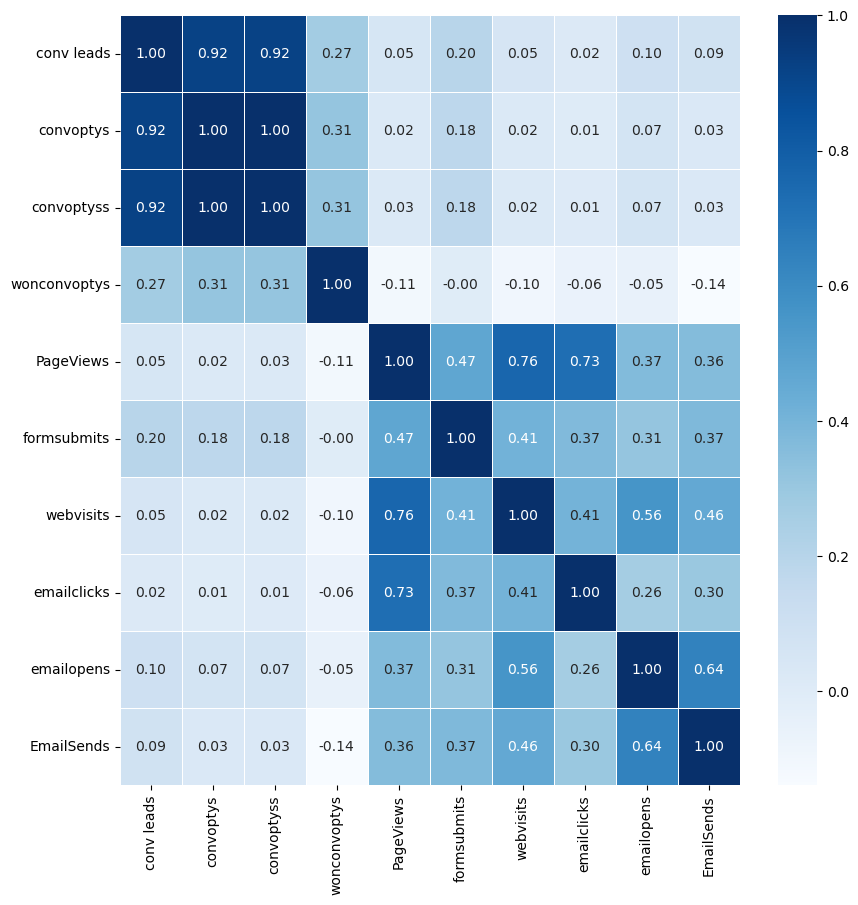

In [99]:
%matplotlib inline   
#쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(10,10))
sns.heatmap(data = numerical_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')